In [1]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(rstatix)
library(parallel)
library(ggpubr)
library(ComplexHeatmap)
library(compositions)
library(ggsci)
library(math)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4


Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    muta

ERROR: Error in library(compositions): there is no package called ‘compositions’


# Read the deseq2 files generated in 1A

In [28]:
female_degs <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Female_Deseq2_Result_Y1D0.csv")
male_degs <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/Male_Deseq2_Result_Y1D0.csv")

In [31]:
female_il1b_subset <- female_degs %>% filter(celltype== "IL1B+ CD14 monocyte")
male_il1b_subset <- male_degs %>% filter(celltype== "IL1B+ CD14 monocyte")

In [32]:
write.csv(female_il1b_subset, "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/IL1B_cd14mono_Female_Deseq2_Result_Y1D0.csv")
write.csv(male_il1b_subset, "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/DESEQ2/IL1B_cd14mono_Male_Deseq2_Result_Y1D0.csv")

In [4]:
head(female_degs)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


In [7]:
female_subset <- female_degs %>% filter(celltype == "IL1B+ CD14 monocyte", padj < 0.1)
male_subset <- male_degs %>% filter(celltype == "IL1B+ CD14 monocyte", padj < 0.1)

In [8]:
female_subset

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
192903,19.097923,1.0170815,0.21954878,4.632599,3.611035e-06,0.005727102,cohort.cohortGuid,BR2,PTGS2,IL1B+ CD14 monocyte,Female
192904,35.218851,0.8060933,0.17017765,4.736775,2.171455e-06,0.005727102,cohort.cohortGuid,BR2,BCL2A1,IL1B+ CD14 monocyte,Female
192905,9.063871,0.7827152,0.17915695,4.368880,1.248855e-05,0.013204562,cohort.cohortGuid,BR2,NLRP3,IL1B+ CD14 monocyte,Female
192906,208.585370,0.1870544,0.04424699,4.227506,2.362958e-05,0.018738259,cohort.cohortGuid,BR2,OAZ1,IL1B+ CD14 monocyte,Female
192907,16.934799,1.4166163,0.37558388,3.771771,1.620932e-04,0.073619592,cohort.cohortGuid,BR2,G0S2,IL1B+ CD14 monocyte,Female
192908,22.875834,0.3950609,0.10513449,3.757672,1.715013e-04,0.073619592,cohort.cohortGuid,BR2,CMTM6,IL1B+ CD14 monocyte,Female
192909,11.859483,0.9072969,0.24333428,3.728603,1.925442e-04,0.073619592,cohort.cohortGuid,BR2,RASGEF1B,IL1B+ CD14 monocyte,Female
192910,5.643832,0.7191839,0.19329037,3.720744,1.986370e-04,0.073619592,cohort.cohortGuid,BR2,RIPK2,IL1B+ CD14 monocyte,Female
192911,5.119876,0.6556607,0.17682212,3.708024,2.088828e-04,0.073619592,cohort.cohortGuid,BR2,RABL6,IL1B+ CD14 monocyte,Female


In [9]:
male_subset

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>


# Volcano Plot- Female DEGs

In [11]:
female_vol <- female_degs %>% filter(celltype== "IL1B+ CD14 monocyte")
female_vol

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
192903,19.097923,1.0170815,0.21954878,4.632599,3.611035e-06,0.005727102,cohort.cohortGuid,BR2,PTGS2,IL1B+ CD14 monocyte,Female
192904,35.218851,0.8060933,0.17017765,4.736775,2.171455e-06,0.005727102,cohort.cohortGuid,BR2,BCL2A1,IL1B+ CD14 monocyte,Female
192905,9.063871,0.7827152,0.17915695,4.368880,1.248855e-05,0.013204562,cohort.cohortGuid,BR2,NLRP3,IL1B+ CD14 monocyte,Female
192906,208.585370,0.1870544,0.04424699,4.227506,2.362958e-05,0.018738259,cohort.cohortGuid,BR2,OAZ1,IL1B+ CD14 monocyte,Female
192907,16.934799,1.4166163,0.37558388,3.771771,1.620932e-04,0.073619592,cohort.cohortGuid,BR2,G0S2,IL1B+ CD14 monocyte,Female
192908,22.875834,0.3950609,0.10513449,3.757672,1.715013e-04,0.073619592,cohort.cohortGuid,BR2,CMTM6,IL1B+ CD14 monocyte,Female
192909,11.859483,0.9072969,0.24333428,3.728603,1.925442e-04,0.073619592,cohort.cohortGuid,BR2,RASGEF1B,IL1B+ CD14 monocyte,Female
192910,5.643832,0.7191839,0.19329037,3.720744,1.986370e-04,0.073619592,cohort.cohortGuid,BR2,RIPK2,IL1B+ CD14 monocyte,Female
192911,5.119876,0.6556607,0.17682212,3.708024,2.088828e-04,0.073619592,cohort.cohortGuid,BR2,RABL6,IL1B+ CD14 monocyte,Female


In [13]:
# Classify genes based on fold change and adjusted P-value
female_vol$Color <- ifelse(female_vol$padj < 0.1, ifelse(female_vol$log2FoldChange > 0.1, "Upregulated in BR2", "Downregulated in BR2"), "Unchanged")


In [34]:
# # Assuming 'df' is your dataframe and 'column_name' is the name of the column
# rows_with_na <- data[is.na(data$Color), ]

# # View the rows with NA values in the specified column
# print(rows_with_na)

In [14]:
#remove columns that are NAs due to it being NA in padj from deseq2 run
female_vol <- female_vol[complete.cases(female_vol$Color), ]

In [15]:
top <- 30
top_genes <- bind_rows(
  female_vol %>% 
    filter(Color == 'Upregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top),
  female_vol %>% 
    filter(Color == 'Downregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top))

In [16]:
unique(female_vol$Color)

[1] "Upregulated in BR2" "Unchanged"

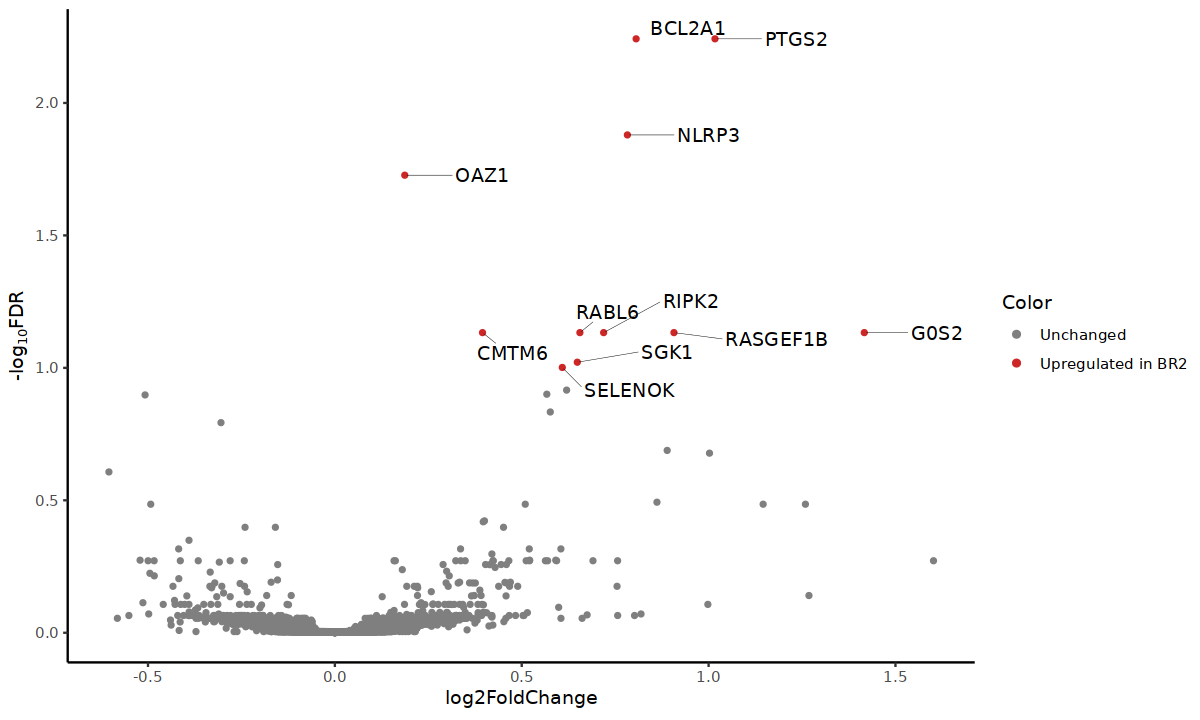

In [20]:
library(ggrepel)

# Sorting data to find top 25 genes by P-value
#top_genes <- data[order(data$padj),][1:50,]

options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(female_vol, aes(log2FoldChange, -log(padj,10))) +
  geom_point(aes(color = Color), size = 1) +
  xlab(expression("log2FoldChange")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Downregulated in BR2"="dodgerblue3", "Unchanged"="gray50", "Upregulated in BR2"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=1.5))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=50,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(log2FoldChange, -log(padj,10), label = gene),
                   size = 4)+theme_classic()

# Volcano Plot - Male DEGs

In [21]:
male_vol <- male_degs %>% filter(celltype== "IL1B+ CD14 monocyte")
male_vol

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
187694,3.444507,-0.7604269,0.2218244,-3.428058,0.0006079146,0.5136828,cohort.cohortGuid,BR1,GALNT2,IL1B+ CD14 monocyte,Male
187695,15.374884,-0.5374840,0.1593581,-3.372805,0.0007440652,0.5136828,cohort.cohortGuid,BR1,NABP1,IL1B+ CD14 monocyte,Male
187696,4.929348,-0.8141584,0.2405496,-3.384576,0.0007128816,0.5136828,cohort.cohortGuid,BR1,CAMK2D,IL1B+ CD14 monocyte,Male
187697,3.743164,-0.7110416,0.2021278,-3.517782,0.0004351705,0.5136828,cohort.cohortGuid,BR1,UIMC1,IL1B+ CD14 monocyte,Male
187698,5.034524,0.6233243,0.1758083,3.545477,0.0003919029,0.5136828,cohort.cohortGuid,BR2,CYSLTR1,IL1B+ CD14 monocyte,Male
187699,2.028097,1.0890668,0.2891187,3.766850,0.0001653202,0.5136828,cohort.cohortGuid,BR2,TMEM268,IL1B+ CD14 monocyte,Male
187700,8.822915,0.5421722,0.1497508,3.620496,0.0002940393,0.5136828,cohort.cohortGuid,BR2,CCDC59,IL1B+ CD14 monocyte,Male
187701,8.192119,-0.5224288,0.1506331,-3.468222,0.0005239150,0.5136828,cohort.cohortGuid,BR1,LSM12,IL1B+ CD14 monocyte,Male
187702,3.351422,-0.8181894,0.2435070,-3.360024,0.0007793570,0.5136828,cohort.cohortGuid,BR1,ATP9B,IL1B+ CD14 monocyte,Male


In [22]:
# Classify genes based on fold change and adjusted P-value
male_vol$Color <- ifelse(male_vol$padj < 0.1, ifelse(male_vol$log2FoldChange > 0.1, "Upregulated in BR2", "Downregulated in BR2"), "Unchanged")


In [23]:
# # Assuming 'df' is your dataframe and 'column_name' is the name of the column
# rows_with_na <- data[is.na(data$Color), ]

# # View the rows with NA values in the specified column
# print(rows_with_na)

In [24]:
#remove columns that are NAs due to it being NA in padj from deseq2 run
male_vol <- male_vol[complete.cases(male_vol$Color), ]

In [25]:
top <- 30
top_genes <- bind_rows(
  male_vol %>% 
    filter(Color == 'Upregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top),
  male_vol %>% 
    filter(Color == 'Downregulated in BR2') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top))

In [26]:
unique(male_vol$Color)

[1] "Unchanged"

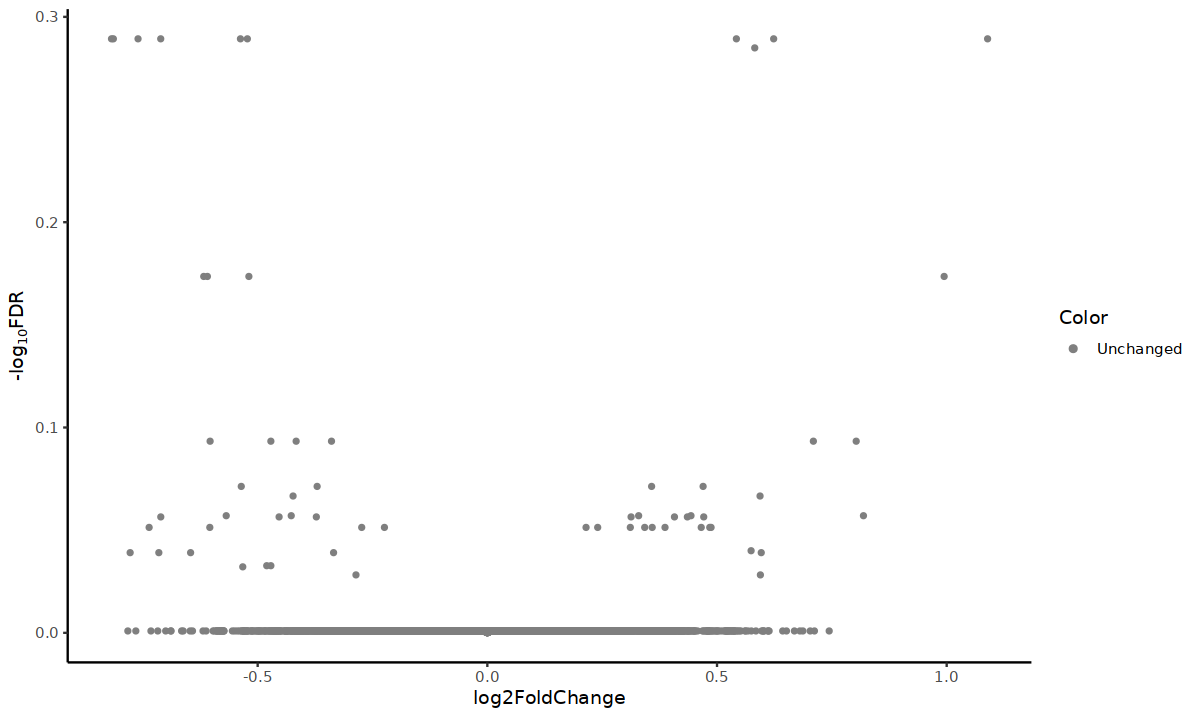

In [27]:
library(ggrepel)

# Sorting data to find top 25 genes by P-value
#top_genes <- data[order(data$padj),][1:50,]

options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(male_vol, aes(log2FoldChange, -log(padj,10))) +
  geom_point(aes(color = Color), size = 1) +
  xlab(expression("log2FoldChange")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Downregulated in BR2"="dodgerblue3", "Unchanged"="gray50", "Upregulated in BR2"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=1.5))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=50,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(log2FoldChange, -log(padj,10), label = gene),
                   size = 4)+theme_classic()